In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.shape

(768, 9)

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
x = df.drop(['Outcome'],axis=1)

In [17]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [18]:
y = df['Outcome']

In [19]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [20]:
#Split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
scorelist=[]
k_range = range(1,26)
for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_train,y_train)
    y_predict = KNN.predict(x_test)
    scorelist.append(accuracy_score(y_test,y_predict))

Text(0, 0.5, 'Accuaracy Score')

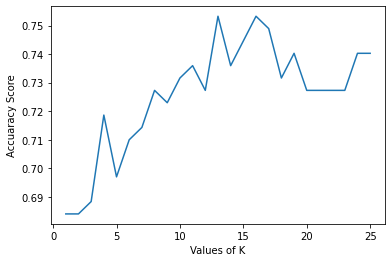

In [23]:
plt.plot(k_range,scorelist)
plt.xlabel("Values of K")
plt.ylabel("Accuaracy Score")

In [25]:
#Apply KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("Predicted Values: ",y_pred)
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred))

Predicted Values:  [0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0]
Accuracy is:  0.7272727272727273
Confusion Matrix:  [[131  18]
 [ 45  37]]


In [27]:
#Error Rate
# Method 1
from sklearn.metrics import accuracy_score,confusion_matrix
cs = confusion_matrix(y_test,y_pred)
total_example = cs[0,0]+cs[0,1]+cs[1,0]+cs[1,1]
total_missclassified = cs[0,1]+cs[1,0]
print("Error Rate is: ",total_missclassified/total_example)

# Method 2
print("Error rate is: ",1-accuracy_score(y_test,y_pred))

Error Rate is:  0.2727272727272727
Error rate is:  0.2727272727272727


In [28]:
#Classification Report
from sklearn.metrics import classification_report
print("Classification report is: ",classification_report(y_test,y_pred))

Classification report is:                precision    recall  f1-score   support

           0       0.74      0.88      0.81       149
           1       0.67      0.45      0.54        82

    accuracy                           0.73       231
   macro avg       0.71      0.67      0.67       231
weighted avg       0.72      0.73      0.71       231



Text(33.0, 0.5, 'Actual Value')

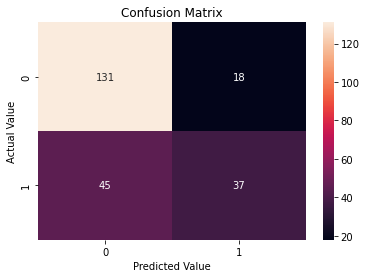

In [30]:
cnf_matrix = confusion_matrix(y_test,y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,fmt='g')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')